Which celeb you want to look up?: rima lagoo


C:\Users\rohanu\AppData\Local\Continuum\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


/name/nm0481363/?ref_=fn_al_nm_1


C:\Users\rohanu\AppData\Local\Continuum\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Counter({'1994': 17, '1992': 15, '1999': 9, '1997': 9, '1991': 9, '2006': 8, '1998': 8, '1995': 8, '1993': 8, '2000': 7, '1996': 7, '2002': 6, '2013': 5, '2009': 5, '2003': 5, '2001': 5, '2015': 4, '2008': 4, '2005': 4, '2004': 4, '1990': 4, '1988': 4, '2012': 3, '2010': 3, '2007': 3, '2016': 2, '2011': 2, '1985': 2, '2017': 1, '2014': 1, '1989': 1, '1984': 1, '1983': 1, '1981': 1, '1980': 1, '1979': 1})


C:\Users\rohanu\AppData\Local\Continuum\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


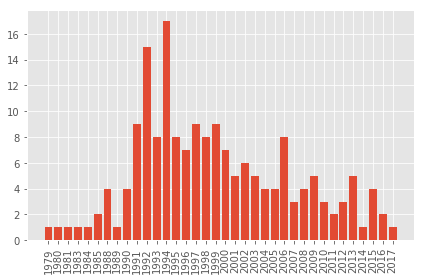

In [15]:
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('ggplot')


name_to_search = input("Which celeb you want to look up?: ")
entire_url_to_query_to_get_actor_code = 'http://www.imdb.com/find?ref_=nv_sr_fn&q=' + name_to_search



r = requests.get(entire_url_to_query_to_get_actor_code, verify=False,)

soup = BeautifulSoup(r.content , "lxml", )



actor = soup.find('td' , class_='result_text')


encoded_name_link = actor.find('a')
uri_portion = ((encoded_name_link['href']))
print(uri_portion)

entire_url_to_query_to_get_actor_page = 'http://www.imdb.com' + uri_portion
actor_page_response = requests.get(entire_url_to_query_to_get_actor_page, verify=False,  )
actor_soup = BeautifulSoup(actor_page_response.content , 'lxml')


films_tag = actor_soup.find( 'div', class_='filmo-category-section', )

#print(films_tag)

ruleset_of_years = (films_tag.findAll('span' , class_='year_column'))

#print(ruleset_of_years)

list_of_years = []

for year in range(len(ruleset_of_years)):
    list_of_years.append(ruleset_of_years[year].text)
    #print(ruleset_of_years[year].text)

    
    

#print (list_of_years)
#list_of_movies_actor_a = []
#
#for each_tag in ruleset_of_b:
#    #print((each_tag.text))
#    
#    list_of_movies_actor_a.append(each_tag.text)
#    
#    
#print (list_of_movies_actor_a)
    
#    list_of_years_characters_removed.append(list_of_years[each_string].replace('\\n',''))


#for each_string in range(len(list_of_years)):
#    list_of_years[each_string].replace('2019','1111')

list_of_years_just_digits = []
    
#print(type(list_of_years))  


for each_string in list_of_years:
    list_of_years_just_digits.append(re.sub('[^0-9]', '', each_string))
    #print ((each_string))
    
#print (list_of_years_just_digits)    
count = Counter(list_of_years_just_digits)   
print ((count))



lists = sorted(count.items())
x, y = zip(*lists)
plt.xticks(rotation=90,)

#fig_size = plt.rcParams["figure.figsize"]
# # Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
#fig_size[0] = 10
#fig_size[1] = 8
#plt.rcParams["figure.figsize"] = fig_size
plt.rcParams.update({'figure.autolayout': True})
#plt.margins(x=-0.1)

plt.bar(x, y)
plt.show()